#Money Change Again#

In [ ]:
%%writefile Money_Change_Again.cpp
#include <iostream>

int get_change(int m){
  int MinNumCoins[m] = {};
  MinNumCoins[0] = 0;
  int Coins [] = {1,3,4};
  for(int i = 1; i <= m; i++){
    MinNumCoins[i] = 2147483647;
    for(int j = 0; j < 3; j++){
  		if(i >= Coins[j]){
		    int NumCoins = MinNumCoins[i-Coins[j]] + 1;
		    if(NumCoins < MinNumCoins[i]){
          MinNumCoins[i] = NumCoins;
        }
		  }
  	}
  }
  return MinNumCoins[m];
}

int main() {
  int m;
  std::cin >> m;
  std::cout << get_change(m) << '\n';
}

Overwriting Money_Change_Again.cpp


In [ ]:
!g++ Money_Change_Again.cpp -o Money_Change_Again
!./Money_Change_Again

2
2


In [ ]:
!g++ Money_Change_Again.cpp -o Money_Change_Again
!./Money_Change_Again

34
9


#Primitive Calculator#

In [ ]:
%%writefile Primitive_Calculator.cpp
#include <iostream>
#include <limits>
#include <vector>
#include <algorithm>

using std::vector;
using std::min;

vector<int> optimal_sequence(int n) {
	vector<int> hops(n + 1);
	vector<int> sequences;
  int max_int = std::numeric_limits<int>::max();
	int opt1, opt2, opt3;
	for (int i = 2; i <= n; i++) {
		opt1 = max_int;
    opt2 = max_int;
    opt3 = max_int;
		if (i - 1 >= 0) { 
      opt1 = hops[i - 1] + 1; 
    }
		if (i % 2 == 0 && i / 2 >= 0) { 
      opt2 = hops[i / 2] + 1; 
    }
		if (i % 3 == 0 && i / 3 >= 0) {
       opt3 = hops[i / 3] + 1; 
    }
		hops[i] = min(opt1, min(opt2, opt3));
	}
	int nums = hops[n];
	while (n > 1) {
		if (n % 3 == 0 && hops[n / 3] + 1 == hops[n]) {
			sequences.push_back(n);
			n = n/3;
		} else if (n % 2 == 0 && hops[n / 2] + 1 == hops[n]) {
			sequences.push_back(n);
			n = n/2;
		} else if (hops[n - 1] + 1 == hops[n]) {
			sequences.push_back(n);
			n -= 1;
		}
	}
	sequences.push_back(1);
	reverse(sequences.begin(), sequences.end());
	return sequences;
}

int main() {
	int n;
	std::cin >> n;
	// cout << optimal_sequence(n) << endl;

	vector<int> sequence = optimal_sequence(n);
	std::cout << sequence.size() - 1 << std::endl;
	for (size_t i = 0; i < sequence.size(); ++i) {
		std::cout << sequence[i] << " ";
	}
}

Overwriting Primitive_Calculator.cpp


In [ ]:
!g++ Primitive_Calculator.cpp -o Primitive_Calculator
!./Primitive_Calculator

1
0
1 

In [ ]:
!g++ Primitive_Calculator.cpp -o Primitive_Calculator
!./Primitive_Calculator

5
3
1 2 4 5 

In [ ]:
!g++ Primitive_Calculator.cpp -o Primitive_Calculator
!./Primitive_Calculator

96234
14
1 3 9 10 11 22 66 198 594 1782 5346 16038 16039 32078 96234 

#Edit Distance#

In [ ]:
%%writefile Edit_Distance.cpp
#include <iostream>
#include <string>
#include <algorithm>

using std::string;

int edit_distance(const string &str1, const string &str2) {
  int m = str1.size();
  int n = str2.size();
  int D[m + 1][n + 1];
  for(int a = 0; a < m + 1; a++){
      D[a][0] = a;
  }
  for(int b = 0; b < n + 1; b++){
      D[0][b] = b;
  }

  for(int i = 1; i <= m; i++){
    for(int j = 1; j <= n; j++){
          int insertion = D[i][j-1] + 1;
          int deletion = D[i-1][j] + 1;
          int match = D[i-1][j-1];
          int mismatch = D[i-1][j-1] + 1;
          if(str1[i-1] == str2[j-1]){
              D[i][j] = match;
          }else{
              int min_2 = std::min(insertion, deletion);
              D[i][j] = std::min(min_2, mismatch);
          }
      }
  	}
  return D[m][n];
}

int main() {
  string str1;
  string str2;
  std::cin >> str1 >> str2;
  std::cout << edit_distance(str1, str2) << std::endl;
  return 0;
}

Overwriting Edit_Distance.cpp


In [ ]:
!g++ Edit_Distance.cpp -o Edit_Distance
!./Edit_Distance

ab
ab
0


In [ ]:
!g++ Edit_Distance.cpp -o Edit_Distance
!./Edit_Distance

short
ports
3


In [ ]:
!g++ Edit_Distance.cpp -o Edit_Distance
!./Edit_Distance

editing
distance
5


#Longest Common Subsequence of Two Sequences#

In [ ]:
%%writefile Longest_Common_Subsequence_of_Two_Sequences.cpp
#include <iostream>
#include <vector>

using std::vector;

int lcs2(vector<int> &a, vector<int> &b) {
  int matrix[a.size() + 1][b.size() + 1];
  for(int i = 0; i <= a.size(); i++){
      matrix[i][0] = 0;
  }
  for(int j = 0; j <= b.size(); j++){
      matrix[0][j] = 0;
  }
  for(int i = 1; i <= a.size(); i++){
      for(int j = 1; j <= b.size(); j++){
        int diagonal = matrix[i-1][j-1] + 1;
        int left = matrix[i][j-1];
        int up = matrix[i-1][j];
        if(a[i-1] == b[j-1]){
            matrix[i][j] = diagonal;
        }else{
            matrix[i][j] = std::max(up, left);
        }
      }
  }
  return matrix[a.size()][b.size()];
}

int main() {
  size_t n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < n; i++) {
    std::cin >> a[i];
  }

  size_t m;
  std::cin >> m;
  vector<int> b(m);
  for (size_t i = 0; i < m; i++) {
    std::cin >> b[i];
  }

  std::cout << lcs2(a, b) << std::endl;
}

Overwriting Longest_Common_Subsequence_of_Two_Sequences.cpp


In [ ]:
!g++ Longest_Common_Subsequence_of_Two_Sequences.cpp -o Longest_Common_Subsequence_of_Two_Sequences
!./Longest_Common_Subsequence_of_Two_Sequences

3
2 7 5
2
2 5
2


In [ ]:
!g++ Longest_Common_Subsequence_of_Two_Sequences.cpp -o Longest_Common_Subsequence_of_Two_Sequences
!./Longest_Common_Subsequence_of_Two_Sequences

1
7
4
1 2 3 4
0


In [ ]:
!g++ Longest_Common_Subsequence_of_Two_Sequences.cpp -o Longest_Common_Subsequence_of_Two_Sequences
!./Longest_Common_Subsequence_of_Two_Sequences

4
2 7 8 3
4
5 2 8 7
2


#Longest Common Subsequence of Three Sequences#

In [ ]:
%%writefile Longest_Common_Subsequence_of_Three_Sequences.cpp
#include <iostream>
#include <vector>

using std::vector;
using std::max;

int lcs3(vector<int> &a, vector<int> &b, vector<int> &c) {
  int matrix[a.size() + 1][b.size() + 1][c.size() + 1];
  for(int i = 0; i <= a.size(); i++){
      for(int j = 0; j <= b.size(); j++){
        for(int k = 0; k <= c.size(); k++){
            matrix[i][j][k] = 0;
        }
      }
  }
  for(int i = 1; i <= a.size(); i++){
      for(int j = 1; j <= b.size(); j++){
        for(int k = 1; k <= c.size(); k++){
            if(a[i-1] == b[j-1] && b[j-1] == c[k-1]){
              matrix[i][j][k] = matrix[i - 1][j - 1][k - 1] + 1;
            }else{
              matrix[i][j][k] = max(matrix[i][j][k -1], max(matrix[i][j- 1][k], 
                                max(matrix[i - 1][j][k], max(matrix[i][j - 1][k -1], 
                                max(matrix[i - 1][j][k -1], max(matrix[i - 1][j - 1][k],
                                matrix[i - 1][j - 1][k -1] ) ) ) ) ) );
            }
        }
      }
  }
  return matrix[a.size()][b.size()][c.size()];
}

int main() {
  size_t an;
  std::cin >> an;
  vector<int> a(an);
  for (size_t i = 0; i < an; i++) {
    std::cin >> a[i];
  }
  size_t bn;
  std::cin >> bn;
  vector<int> b(bn);
  for (size_t i = 0; i < bn; i++) {
    std::cin >> b[i];
  }
  size_t cn;
  std::cin >> cn;
  vector<int> c(cn);
  for (size_t i = 0; i < cn; i++) {
    std::cin >> c[i];
  }
  std::cout << lcs3(a, b, c) << std::endl;
}

Writing Longest_Common_Subsequence_of_Three_Sequences.cpp


In [ ]:
!g++ Longest_Common_Subsequence_of_Three_Sequences.cpp -o Longest_Common_Subsequence_of_Three_Sequences
!./Longest_Common_Subsequence_of_Three_Sequences

3
1 2 3
3
2 1 3
3
1 3 5
2


In [ ]:
!g++ Longest_Common_Subsequence_of_Three_Sequences.cpp -o Longest_Common_Subsequence_of_Three_Sequences
!./Longest_Common_Subsequence_of_Three_Sequences

5
8 3 2 1 7
7
8 2 1 3 8 10 7
6
6 8 3 1 4 7
3


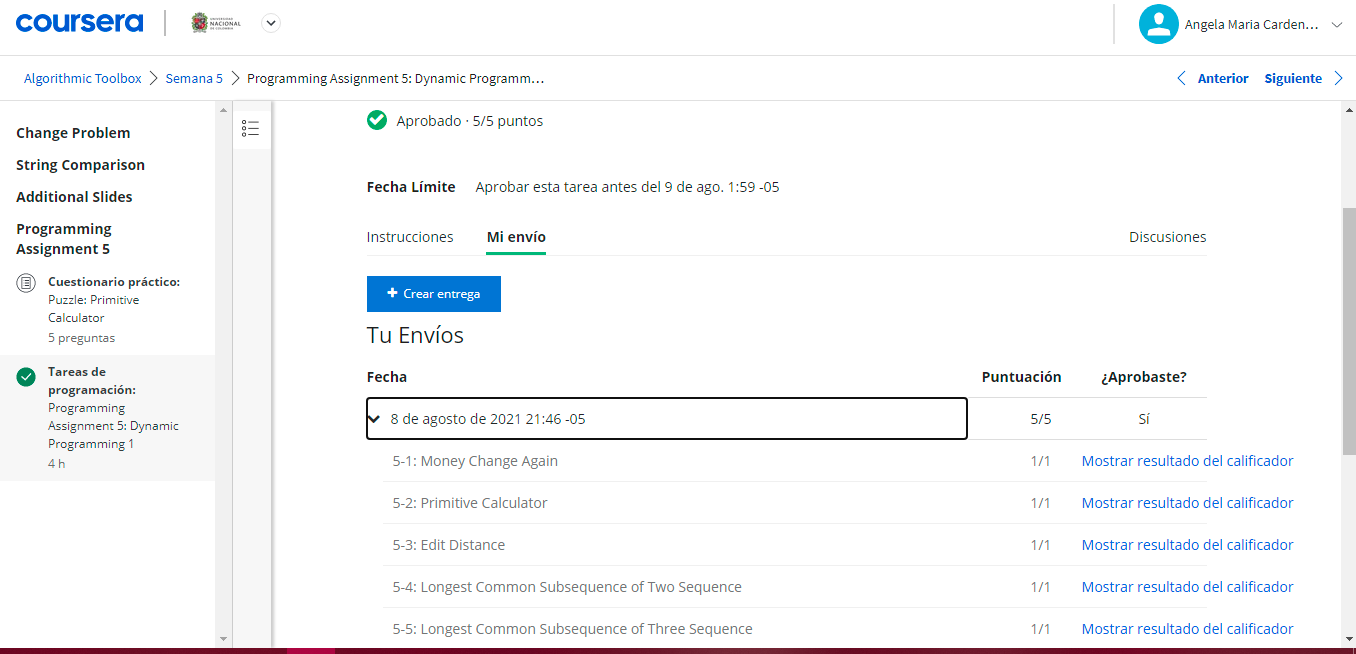